### Understanding the data

In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv('/content/tvmarketing.csv')

# TV - advertising budget spent on TV marketing
# Sales - how much we have sold (revenue, income)

In [3]:
advertising.head() #first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
advertising.describe()

### Regression plot

In [5]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

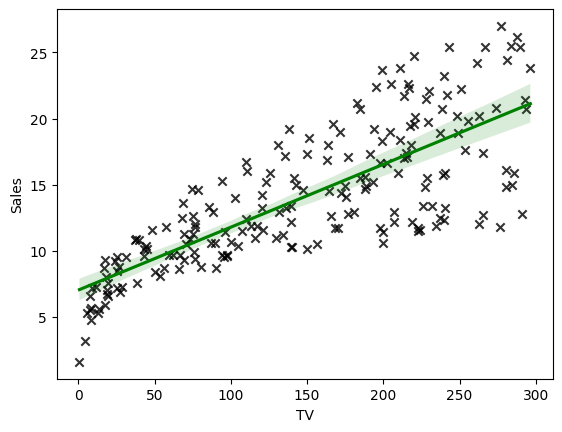

In [7]:
sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [9]:
# Pearson correlation koefficient
advertising.corr() #calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [10]:
advertising['TV'].corr(advertising['Sales']) #positive, strong

0.7822244248616061

### SUPERVISED VS UNSUPERVISED

![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

# Training linear regression model

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
# Preparing X and Y
X = advertising.drop('Sales', axis=1) #independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
Y = advertising.drop('TV', axis=1) #the outcome, dependent
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


# Train/Test sets

In [13]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

In [25]:
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [ ]:
# COLUMN - FEATURE
# ROW - OBSERVATION

### Train the model

In [26]:
from sklearn.linear_model import LinearRegression #Import the model

In [27]:
model = LinearRegression() #Initialize the model

In [28]:
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [32]:
### Y = mX + b ###

print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


### A prediction

In [43]:
my_new_budget = [[50]] #2D array dataset

my_predicted_sales = model.predict(my_new_budget)

print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 50, then predicted sales are 10.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [46]:
y_pred = model.predict(X_test)

In [48]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [49]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

In [50]:
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901
